# Sendy Feature Engineering

## Defining the Research Question

The data provided by Sendy includes order details and rider metrics based on orders made on the Sendy platform. 

The challenge is to predict the estimated time of arrival for
orders- from pick-up to drop-off. 

Prerequisites

In [2]:
# Let's first import the libraries that we will need
# ----
#
import pandas as pd               # pandas for performing data manipulation
import numpy as np                # numpy for performing scientific computations
import matplotlib.pyplot as plt   # matplotlib for performing visualisation 
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#The following settings will improve the default style and font sizes for the charts in this notebook.
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder


# importing the required libraries 

from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor  

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor  
from sklearn import metrics 
from sklearn.preprocessing import MinMaxScaler

from math import radians, sin, cos, acos
import math
from math import radians, cos, sin, asin, sqrt

In [3]:
# Loading our dataset
df = pd.read_csv('https://bit.ly/3deaKEM')
df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


## Data Exploration and Cleaning

In [4]:
#checking the size of data 
df.shape

(21201, 29)

the dataset has 21201 rows and 29 columns.

In [5]:
df.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

In [6]:
#importing the glossary of the dataset to understand the columns better
glossary = pd.read_csv('https://bit.ly/30O3xsr')
glossary

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...
1,Vehicle Type,"For this competition limited to bikes, however..."
2,Platform Type,"Platform used to place the order, there are 4 ..."
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31
5,Placement - Weekday (Mo = 1),Placement - Weekday (Monday = 1)
6,Placement - Time,Placement - Time - Time of day the order was p...
7,Confirmation - Day of Month,Confirmation - Day of Month i.e 1-31
8,Confirmation - Weekday (Mo = 1),Confirmation - Weekday (Monday = 1)
9,Confirmation - Time,Confirmation - Time - Time of day the order wa...


In [7]:
# check the data types of each of the columns 
df.dtypes

Order No                                      object
User Id                                       object
Vehicle Type                                  object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)     

the dataset has columns in both numerical and categorical data types.

In [8]:
#Separate categorical and numerical columns in the data frame
numerical_columns = df.columns[df.dtypes !='object']
categorical_columns = df.columns[df.dtypes =='object']

print(numerical_columns)
print(categorical_columns)


Index(['Platform Type', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month',
       'Pickup - Weekday (Mo = 1)', 'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)', 'Distance (KM)',
       'Temperature', 'Precipitation in millimeters', 'Pickup Lat',
       'Pickup Long', 'Destination Lat', 'Destination Long',
       'Time from Pickup to Arrival'],
      dtype='object')
Index(['Order No', 'User Id', 'Vehicle Type', 'Personal or Business',
       'Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time',
       'Pickup - Time', 'Arrival at Destination - Time', 'Rider Id'],
      dtype='object')


In [9]:
#getting the unique values in the categorical columns

df[categorical_columns].nunique().sort_values()

Vehicle Type                         1
Personal or Business                 2
Rider Id                           924
User Id                           3186
Placement - Time                 15686
Pickup - Time                    15690
Arrival at Destination - Time    15725
Confirmation - Time              15742
Arrival at Pickup - Time         15767
Order No                         21201
dtype: int64

1. the 'Vehicle Type' has only of one unique value in the dataset. we may drop that column.


2. 'Personal or Business' has two unique values thus will be encoded before analysis

In [10]:
#checking the spread of the unique values of the column Personal or Business 
df['Personal or Business'].value_counts() 

Business    17384
Personal     3817
Name: Personal or Business, dtype: int64

In [11]:
# Checking if there are duplicated Order No in the dataset using the Order No column
duplicate_order = df[df.duplicated('Order No')].sum()
duplicate_order

Order No                                     0.0
User Id                                      0.0
Vehicle Type                                 0.0
Platform Type                                0.0
Personal or Business                         0.0
Placement - Day of Month                     0.0
Placement - Weekday (Mo = 1)                 0.0
Placement - Time                             0.0
Confirmation - Day of Month                  0.0
Confirmation - Weekday (Mo = 1)              0.0
Confirmation - Time                          0.0
Arrival at Pickup - Day of Month             0.0
Arrival at Pickup - Weekday (Mo = 1)         0.0
Arrival at Pickup - Time                     0.0
Pickup - Day of Month                        0.0
Pickup - Weekday (Mo = 1)                    0.0
Pickup - Time                                0.0
Arrival at Destination - Day of Month        0.0
Arrival at Destination - Weekday (Mo = 1)    0.0
Arrival at Destination - Time                0.0
Distance (KM)       

Observations made
1.   Each record of the dataset represents one order. there are no duplicated records using the order no, which is a unique value.
Therefore the dataset contains 21201 delivery order records and 29 columns describing various order attributes. 

1. the 'Order No' is unique for all columns thus may not be useful to the model.


In [12]:
#dropping 'Vehicle Type' and 'Order No' columns
df = df.drop(['Vehicle Type' ,'Order No'], axis=1 )
df

,User Id,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,User_Id_633,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,User_Id_2285,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,User_Id_265,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,User_Id_1402,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,User_Id_1737,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,User_Id_2001,3,Personal,20,3,3:54:38 PM,20,3,3:55:09 PM,20,3,3:58:49 PM,20,3,4:20:08 PM,20,3,4:20:17 PM,3,28.6,NaN,-1.258414,36.804800,-1.275285,36.802702,Rider_Id_953,9
21197,User_Id_1796,3,Business,13,6,10:13:34 AM,13,6,10:13:41 AM,13,6,10:20:04 AM,13,6,10:33:27 AM,13,6,10:46:17 AM,7,26.0,NaN,-1.307143,36.825009,-1.331619,36.847976,Rider_Id_155,770
21198,User_Id_2956,3,Business,7,4,5:06:16 PM,7,4,5:07:09 PM,7,4,5:30:17 PM,7,4,5:50:52 PM,7,4,6:40:05 PM,20,29.2,NaN,-1.286018,36.897534,-1.258414,36.804800,Rider_Id_697,2953
21199,User_Id_2524,1,Personal,4,3,9:31:39 AM,4,3,9:31:53 AM,4,3,9:38:59 AM,4,3,9:45:15 AM,4,3,10:08:15 AM,13,15.0,NaN,-1.250030,36.874167,-1.279209,36.794872,Rider_Id_347,1380


## Data Analysis

In [13]:
# view the frequency of orders by day of week vs Customer type ie business or personal
px.histogram(df, x='Placement - Weekday (Mo = 1)', title='Customer_Type vs Day of the week', color='Personal or Business').update_xaxes(categoryorder='total descending')

Observation: 

the business orders were placed most on Day = 4 (Thursday) while the least were on Day=7 (Sunday)

The personal orders were placed most on Friday and Monday

In [14]:
# # view the frequency of orders by Day of the month vs Customer type ie business or personal
px.histogram(df, x='Placement - Day of Month', title='Customer_Type vs Day of the month', color='Personal or Business').update_xaxes(categoryorder='total descending')

Observation: 

the business orders were placed most on Day = 4 (Thursday) while the least were on Day=7 (Sunday)

The personal orders were placed most on Friday and Monday

In [15]:
# view the most used platform for placing the orders as distributed by Customer type ie business or personal

px.histogram(df, x='Platform Type', title='Platform Type vs Order_Type', color='Personal or Business').update_xaxes(categoryorder='total descending')

1. Most business order used platfrom 3 to place their orders, and  used platfom 4 the least. Total Business orders that used platform 3 were 16,984 

2. Most Personal orders used platfrom 1 to place their orders, No personal orders were placed on platform 4 . Total personal orders that used platform 1 were 1830 

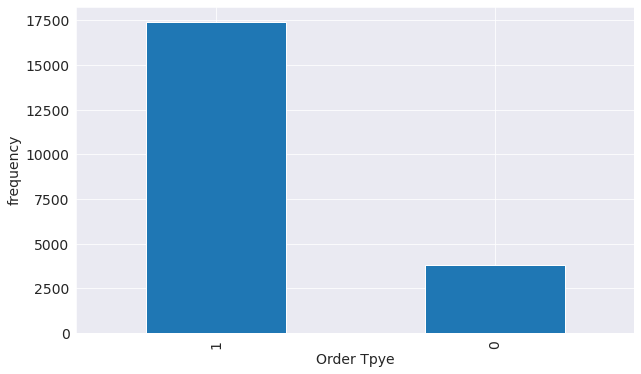

In [16]:
#encode the column 'Personal or Business' in order to plot the frequency of order type
df['Personal or Business'] = np.where(df['Personal or Business'].str.contains("Business", "Personal"), 1, 0)

#visualize the orders types: Personal or Business
fig, ax = plt.subplots()
df['Personal or Business'].value_counts().plot(ax=ax, kind='bar', xlabel='Order Tpye', ylabel='frequency')

plt.show()

the business orders made up the most of the sendy orders

### Dealing with Null values

Null values adversely affect the performance and accuracy of machine learning algorithms. we shall impute the null values in the Temperature column in the dataset before applying any machine learning algorithm 




In [17]:
# check how many null values exist in the data.
df.isnull().sum().sort_values(ascending = False)

Precipitation in millimeters                 20649
Temperature                                   4366
Time from Pickup to Arrival                      0
Arrival at Pickup - Time                         0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Pickup - Weekday (Mo = 1)                        0
Pickup - Day of Month                            0
Rider Id                                         0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekda

the column temperature has 4366 missing values

In [18]:
# # filling the missing values in the Temperature Column with the mean of that column
#Finding the mean of the Temperature column 
mean_value_temp=df['Temperature'].mean()
  
# Replace NaNs in column Temperature with the mean_value_temp

df['Temperature'].fillna(value=mean_value_temp, inplace=True)

In [19]:
# check if the column 'Temperature' was imputed with the mean
df.isnull().sum().sort_values(ascending = False)

Precipitation in millimeters                 20649
Time from Pickup to Arrival                      0
Pickup - Day of Month                            0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Weekday (Mo = 1)                        0
Rider Id                                         0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

### Base Model
First we check for modeling without normalisation and standardisation


#### Identifying Input and Target Columns of base model

In the features columns of our training and testing test datasets, the below columns have been dropped based on the following criteria

1. Columns not having data needed for making the predictions : 'User Id','Rider Id'

2. Time columns that may leak info to teh models target columns: 'Placement - Time','Confirmation - Time','Arrival at Pickup - Time','Pickup - Time','Arrival at Destination - Time'

3. Distance related columns that may leak info to the models target columns:'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',


4. also, the target column 'Time from Pickup to Arrival' was identified and omitted from the training data

In [20]:
# splitting the training and testing data
from sklearn.model_selection import train_test_split

#selecting the features to use
X = df[['Platform Type','Personal or Business','Placement - Day of Month', 'Placement - Weekday (Mo = 1)','Confirmation - Day of Month','Confirmation - Weekday (Mo = 1)','Arrival at Pickup - Day of Month','Arrival at Pickup - Weekday (Mo = 1)','Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)','Arrival at Destination - Day of Month','Arrival at Destination - Weekday (Mo = 1)','Distance (KM)','Temperature']]
y = df['Time from Pickup to Arrival']

#splitting the subset dataframe X into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)



In [21]:
#view train/test datasets sizes
print('X.shape :', X.shape)
print('X_train.shape :', X_train.shape)
print('X_test.shape :', X_test.shape)


X.shape : (21201, 14)
X_train.shape : (16960, 14)
X_test.shape : (4241, 14)


In [22]:
X_test

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature
4360,3,1,8,2,8,2,8,2,8,2,8,2,4,25.300000
1518,3,0,27,3,27,3,27,3,27,3,27,3,2,29.100000
20014,3,1,10,4,10,4,10,4,10,4,10,4,11,19.300000
3243,3,1,25,2,25,2,25,2,25,2,25,2,4,23.800000
5094,3,1,23,2,23,2,23,2,23,2,23,2,7,19.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18422,1,0,9,2,9,2,9,2,9,2,9,2,13,17.700000
16418,4,1,28,1,28,1,28,1,28,1,28,1,12,22.800000
4085,3,1,27,4,27,4,27,4,27,4,27,4,18,23.800000
1175,3,1,24,3,24,3,24,3,24,3,24,3,5,23.258889


In [23]:
y # target variable 'Time from Pickup to Arrival' is a series

0         745
1        1993
2         455
3        1341
4        1214
         ... 
21196       9
21197     770
21198    2953
21199    1380
21200    2128
Name: Time from Pickup to Arrival, Length: 21201, dtype: int64

In [24]:
X_train

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature
7225,3,1,19,3,19,3,19,3,19,3,19,3,10,24.200000
5983,3,1,9,3,9,3,9,3,9,3,9,3,17,25.300000
10359,3,1,29,1,29,1,29,1,29,1,29,1,6,23.258889
10984,3,0,2,2,2,2,2,2,2,2,2,2,6,26.200000
4829,3,1,18,4,18,4,18,4,18,4,18,4,11,26.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4848,3,1,28,4,28,4,28,4,28,4,28,4,11,19.500000
14879,3,1,6,3,6,3,6,3,6,3,6,3,19,22.300000
3912,3,1,29,1,29,1,29,1,29,1,29,1,6,23.258889
20152,3,1,14,4,14,4,14,4,14,4,14,4,6,25.000000


#### Modelling and evaluation of base model



In [25]:
# # importing the required libraries 
# from sklearn.svm import SVR 
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.tree import DecisionTreeRegressor  


#instantiating the models
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

# Fitting in our models  
svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Evaluating the base model 
from sklearn import metrics 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 848.4418007084463
KNN RMSE: 904.5988593074368
Decision Tree RMSE: 1141.4675146197208


Above are the RMSE values for the base model based on the 3 regression algorithms SVM, KNN and Decision Tree. 

the least RMSE score was obtained using SVM at 848.44 .
we will be looking to reduce this RMSE values in this notebook.


## Feature Improvement Techniques

### Dealing with Outliers

Checking for the outliers in the data as Outliers increase the variability in out data.Outliers can have a disproportionate effect on statistical results, such as the mean, which can result in misleading interpretations



In [26]:
# Getting a statistical summary of our dataset
df.describe()

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,0.819961,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,0.384229,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.222006,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,1.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,21.400000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,1.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.258889,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,1.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,25.300000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,1.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


some columns in the dataset eg  Precipitation in millimeters have outliers 

in this columns the mean>median therefore indicating that the tail is more on the right, ie the data has more variation on the right and can be termed as right-skewed.

In [27]:
#dropping the column 'Precipitation in millimeters' since it has too many null values 
df = df.drop(['Precipitation in millimeters'], axis=1 )
df.shape

(21201, 26)

In [28]:
# check if the column 'Precipitation in millimeters' has been dropped
df.isnull().sum().sort_values(ascending = False)

Time from Pickup to Arrival                  0
Rider Id                                     0
Platform Type                                0
Personal or Business                         0
Placement - Day of Month                     0
Placement - Weekday (Mo = 1)                 0
Placement - Time                             0
Confirmation - Day of Month                  0
Confirmation - Weekday (Mo = 1)              0
Confirmation - Time                          0
Arrival at Pickup - Day of Month             0
Arrival at Pickup - Weekday (Mo = 1)         0
Arrival at Pickup - Time                     0
Pickup - Day of Month                        0
Pickup - Weekday (Mo = 1)                    0
Pickup - Time                                0
Arrival at Destination - Day of Month        0
Arrival at Destination - Weekday (Mo = 1)    0
Arrival at Destination - Time                0
Distance (KM)                                0
Temperature                                  0
Pickup Lat   

### Scaling Numeric Features

Scaling numeric features in the train and test datasets to ensure that no particular feature has a disproportionate impact on the model. 
The numeric columns in our dataset have varying ranges and will scaled to a small range of values between $(0,1)$ 


##### 1) Data Normalization

Normalization of the data using the `MinMaxScaler` from `sklearn.preprocessing` to scale the numerical values to the $(0,1)$ range.

In [29]:
X_train.select_dtypes(include = np.number)

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature
7225,3,1,19,3,19,3,19,3,19,3,19,3,10,24.200000
5983,3,1,9,3,9,3,9,3,9,3,9,3,17,25.300000
10359,3,1,29,1,29,1,29,1,29,1,29,1,6,23.258889
10984,3,0,2,2,2,2,2,2,2,2,2,2,6,26.200000
4829,3,1,18,4,18,4,18,4,18,4,18,4,11,26.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4848,3,1,28,4,28,4,28,4,28,4,28,4,11,19.500000
14879,3,1,6,3,6,3,6,3,6,3,6,3,19,22.300000
3912,3,1,29,1,29,1,29,1,29,1,29,1,6,23.258889
20152,3,1,14,4,14,4,14,4,14,4,14,4,6,25.000000


In [30]:
#instantiate scaler object
scaler = MinMaxScaler()

'Fitting' the scaler to the data by computing the range of values for each numeric column in the X_train and X_test datasets

In [31]:
scaler.fit(X_train)

MinMaxScaler()

In [32]:
# scaler.fit(X_test)

Scaling the dataset using the `transform` method of `scaler`.

In [33]:
# transform the training data
X_train_scaled = scaler.transform(X_train)


In [34]:
# transform the test data
X_test_scaled = scaler.transform(X_test)

Checking that values in each column of the X_train and X_test lie in the range $(0,1)$

In [35]:
X_train_scaled.max()
# X_test.max()


1.0

#### Modelling and evaluation using normalized training and test data



In [36]:
# Fitting in our models 

from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor  


#instantiating the models
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

# Fitting in our models  
svm_regressor.fit(X_train_scaled, y_train)
knn_regressor.fit(X_train_scaled, y_train)
dec_regressor.fit(X_train_scaled, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test_scaled)
knn_y_pred = knn_regressor.predict(X_test_scaled)
dec_y_pred = dec_regressor.predict(X_test_scaled)

# Evaluating the base model 
from sklearn import metrics 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 882.8308488429324
KNN RMSE: 914.0969634507902
Decision Tree RMSE: 1142.2183416934995


After normalization the RMSE for the base model incresed for each algo.

1) SVM RMSE: increased from 848.4418007084463 to 882.8308488429324

2) KNN RMSE: increased from 904.5988593074368 to 914.0969634507902

3) Decision Tree RMSE: incresed from 1141.4675146197208 to 1142.2183416934995

Conclusion; normalization is not the best way to scale the numeric features of this dataset

#### 2) Data Standardization

Standardisation of the data using the `StandardScaler() ` from `sklearn.preprocessing` involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1.

In [37]:
X_train.select_dtypes(include = np.number)

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature
7225,3,1,19,3,19,3,19,3,19,3,19,3,10,24.200000
5983,3,1,9,3,9,3,9,3,9,3,9,3,17,25.300000
10359,3,1,29,1,29,1,29,1,29,1,29,1,6,23.258889
10984,3,0,2,2,2,2,2,2,2,2,2,2,6,26.200000
4829,3,1,18,4,18,4,18,4,18,4,18,4,11,26.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4848,3,1,28,4,28,4,28,4,28,4,28,4,11,19.500000
14879,3,1,6,3,6,3,6,3,6,3,6,3,19,22.300000
3912,3,1,29,1,29,1,29,1,29,1,29,1,6,23.258889
20152,3,1,14,4,14,4,14,4,14,4,14,4,6,25.000000


In [38]:
# Performing standardisation
from sklearn.preprocessing import StandardScaler
# sc = StandardScaler() 
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)

In [39]:
#instantiate scaler object
Standard_scaler = StandardScaler() 

'Fitting' the scaler to the data by computing the range of values for each numeric column in the X_train and X_test datasets

In [40]:
Standard_scaler.fit(X_train)

StandardScaler()

In [41]:
# scaler.fit(X_test)

Scaling the dataset using the `transform` method of `scaler`.

In [42]:
# transform the training data
X_train_scalednew = Standard_scaler.transform(X_train)


In [43]:
# transform the test data
X_test_scalednew = Standard_scaler.transform(X_test)

In [44]:
X_train_scalednew.max()
# X_test.max()


6.933210727321287

#### Modelling and evaluation using scaled training and test data



In [45]:
# Fitting in our models 

from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor  


#instantiating the models
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

# Fitting in our models  
svm_regressor.fit(X_train_scalednew, y_train)
knn_regressor.fit(X_train_scalednew, y_train)
dec_regressor.fit(X_train_scalednew, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test_scalednew)
knn_y_pred = knn_regressor.predict(X_test_scalednew)
dec_y_pred = dec_regressor.predict(X_test_scalednew)

# Evaluating the base model 
from sklearn import metrics 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 856.4039430386794
KNN RMSE: 903.1582553406957
Decision Tree RMSE: 1138.16255162581


SVM RMSE: increased from 848.4418007084463 to 856.4039430386794

KNN RMSE: decreased slightly from 904.5988593074368 to 903.1582553406957

Decision Tree RMSE: decreased slightly from 1141.4675146197208 to 1138.16255162581

Conclusion: Standarization is better for the dataset as the RMSE errors reducted in 2 models albeit by a small margin

## Feature Construction

In [47]:
df.head(3)

,User Id,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,User_Id_633,3,1,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,User_Id_2285,3,0,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,User_Id_265,3,1,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455


###  speed (meters/sec) 

Converting the distance in KMs to Meters, then inserting a 'Speed' column in the dataset which is a calculation of distance in meters/time in seconds



In [48]:
#using a function to compute speed and rename distance and time columns
def speed(df):
    df.rename(columns = {'Distance (KM)':'DistanceInKms'},inplace = True)
    df.rename(columns = {'Time from Pickup to Arrival':'Time'},inplace = True)
    df['Speed'] = (1000 *df.DistanceInKms) /(df.Time)
    return df


In [49]:
#call speed function to df
speed(df)
df.head(5)

,User Id,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,DistanceInKms,Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time,Speed
0,User_Id_633,3,1,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,5.369128
1,User_Id_2285,3,0,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,8.028098
2,User_Id_265,3,1,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,6.593407
3,User_Id_1402,3,1,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,6.711409
4,User_Id_1737,1,0,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,7.413509


In [50]:
df.shape

(21201, 27)

In [51]:
#joining new column Speed to X dataset
sub_df = df["Speed"]
merged_df = X.join(sub_df)
merged_df.head(3)


,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Speed
0,3,1,9,5,9,5,9,5,9,5,9,5,4,20.400000,5.369128
1,3,0,12,5,12,5,12,5,12,5,12,5,16,26.400000,8.028098
2,3,1,30,2,30,2,30,2,30,2,30,2,3,23.258889,6.593407


In [52]:
merged_df.shape

(21201, 15)

In [54]:
# X = df[['Platform Type','Personal or Business','Placement - Day of Month', 'Placement - Weekday (Mo = 1)','Confirmation - Day of Month','Confirmation - Weekday (Mo = 1)','Arrival at Pickup - Day of Month','Arrival at Pickup - Weekday (Mo = 1)','Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)','Arrival at Destination - Day of Month','Arrival at Destination - Weekday (Mo = 1)','Distance (KM)','Temperature']]
# y = df['Time from Pickup to Arrival']

# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)

### Manhattan distance 

Using the pick up latitude and Longitude to calculate the manhattan distance

Formual to calculate the Manhattan Distance is |x1 - x2| + |y1 - y2|. (that is, the difference between the latitudes and the longitudes). So, in your case, it would be:




In [57]:
# Distance, d = 3963.0 * arccos[(sin(lat1) * sin(lat2)) + cos(lat1) * cos(lat2) * cos(long2 – long1)]

In [58]:


# print("Input coordinates of two points:")
# slat = radians(float(input("Starting latitude: ")))
# slon = radians(float(input("Ending longitude: ")))
# elat = radians(float(input("Starting latitude: ")))
# elon = radians(float(input("Ending longitude: ")))

# dist = 6371.01 * acos(sin(slat)*sin(elat) + cos(slat)*cos(elat)*cos(slon - elon))
# print("The distance is %.2fkm." % dist)


# Input coordinates of two points:                                                                              
# Starting latitude: 23.5                                                                                       
# Ending longitude: 67.5                                                                                        
# Starting latitude: 25.5                                                                                       
# Ending longitude: 69.5 

In [59]:
#Latitudes range from -90 to 90, and longitudes range from -180 to 80
df['Pickup Lat'].max()

-1.1471704

In [60]:
df['Pickup Lat'].min()

-1.4383017

In [74]:
# #using a function to compute manhattan distance fr each record and rename latitude and longitude columns
def distance(df):
     df.rename(columns = {'Pickup Lat':'Starting_latitude'},inplace = True)
     df.rename(columns = {'Pickup Long':'Starting_longitude'},inplace = True)
     df.rename(columns = {'Destination Lat':'Ending_latitude'},inplace = True)
     df.rename(columns = {'Destination Long':'Ending_longitude'},inplace = True)
     df['slat'] = (df.Starting_latitude/57.29577951) #covert latitude value to radians
     df['slon'] = (df.Starting_longitude/57.29577951)
     df['elat'] = (df.Ending_latitude/57.29577951)
     df['elon'] = (df.Ending_longitude/57.29577951)
     df[["slat", "slon","elat", "elon"]] = df[["slat", "slon","elat", "elon"]].apply(pd.to_numeric)
    #  df['Manhattan_dist'] = (6371.01 * acos(sin(df.slat) * sin(df.elat) + cos(df.slat) * cos(df.elat)*cos(df.slon - df.elon))).astype(float)
  


In [75]:
distance(df)
df.dtypes

User Id                                       object
Platform Type                                  int64
Personal or Business                           int64
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)      int64
Arrival at Destination - Time                 object
DistanceInKms                                 

In [64]:
#  df['Manhattan_dist'] = (6371.01 * acos(sin(df.slat) * sin(df.elat) + cos(df.slat) * cos(df.elat)*cos(df.slon - df.elon))).astype(float)

In [76]:
df.head(3)

,User Id,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,DistanceInKms,Temperature,Starting_latitude,Starting_longitude,Ending_latitude,Ending_longitude,Rider Id,Time,Speed,slat,slon,elat,elon
0,User_Id_633,3,1,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,5.369128,-0.022999,0.642811,-0.022696,0.642800
1,User_Id_2285,3,0,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,8.028098,-0.023587,0.644015,-0.022602,0.642532
2,User_Id_265,3,1,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,6.593407,-0.022834,0.643039,-0.022705,0.642773


In [78]:
df.slat.max()


-0.02002190056249747

Let's view the results of the new columns created.



In [79]:
df[['slat', 'slon', 'elat', 'elon']].sample(20)


,slat,slon,elat,elon
15723,-0.022219,0.642478,-0.023023,0.642355
15036,-0.022705,0.642773,-0.022092,0.643998
19394,-0.021907,0.641971,-0.022444,0.642074
5496,-0.022212,0.642189,-0.022218,0.642466
17687,-0.021963,0.642365,-0.022734,0.641707
12924,-0.021907,0.641971,-0.022285,0.642410
10266,-0.022083,0.642422,-0.023051,0.642815
20778,-0.022052,0.642085,-0.023047,0.640611
20354,-0.024671,0.644988,-0.022041,0.642404
18835,-0.022527,0.643521,-0.021925,0.642080


In [ ]:
# df['Manhattan_dist'] = (6371.01 * acos(sin(df.slat) * sin(df.elat) + cos(df.slat) * cos(df.elat)*cos(df.slon - df.elon)))

## Feature Selection Techniques

#### Filter Method:Pearson's Correlation Coefficient

Using the pearson's correlation coefficient to resolve the most important features in a dataset and drop features that are not highly correlated to our response variable.


In [82]:
df.head(2)

,User Id,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,DistanceInKms,Temperature,Starting_latitude,Starting_longitude,Ending_latitude,Ending_longitude,Rider Id,Time,Speed,slat,slon,elat,elon
0,User_Id_633,3,1,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,5.369128,-0.022999,0.642811,-0.022696,0.642800
1,User_Id_2285,3,0,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,8.028098,-0.023587,0.644015,-0.022602,0.642532


In [121]:

from sklearn.model_selection import train_test_split

# We select our features

X = df[['Platform Type','Personal or Business','Placement - Day of Month', 'Placement - Weekday (Mo = 1)','Confirmation - Day of Month','Confirmation - Weekday (Mo = 1)','Arrival at Pickup - Day of Month','Arrival at Pickup - Weekday (Mo = 1)','Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)','Arrival at Destination - Day of Month','Arrival at Destination - Weekday (Mo = 1)','DistanceInKms','Temperature','Speed', 'slat','slon','elat','elon']]
y = df['Time']

#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)
X.head(3)

# Performing standardisation
from sklearn.preprocessing import StandardScaler

#instantiate scaler object
Standard_scaler = StandardScaler() 

#fit the scaler
Standard_scaler.fit(X_train)

# transform the training&test data ie Scaling the dataset using the transform method of scaler.
X_train = Standard_scaler.transform(X_train)
X_test = Standard_scaler.transform(X_test)


# Fitting in our models   
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluating our models  
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))



SVM RMSE: 850.4777457581517
KNN RMSE: 862.0363601524862
Decision Tree RMSE: 83.62216001093891


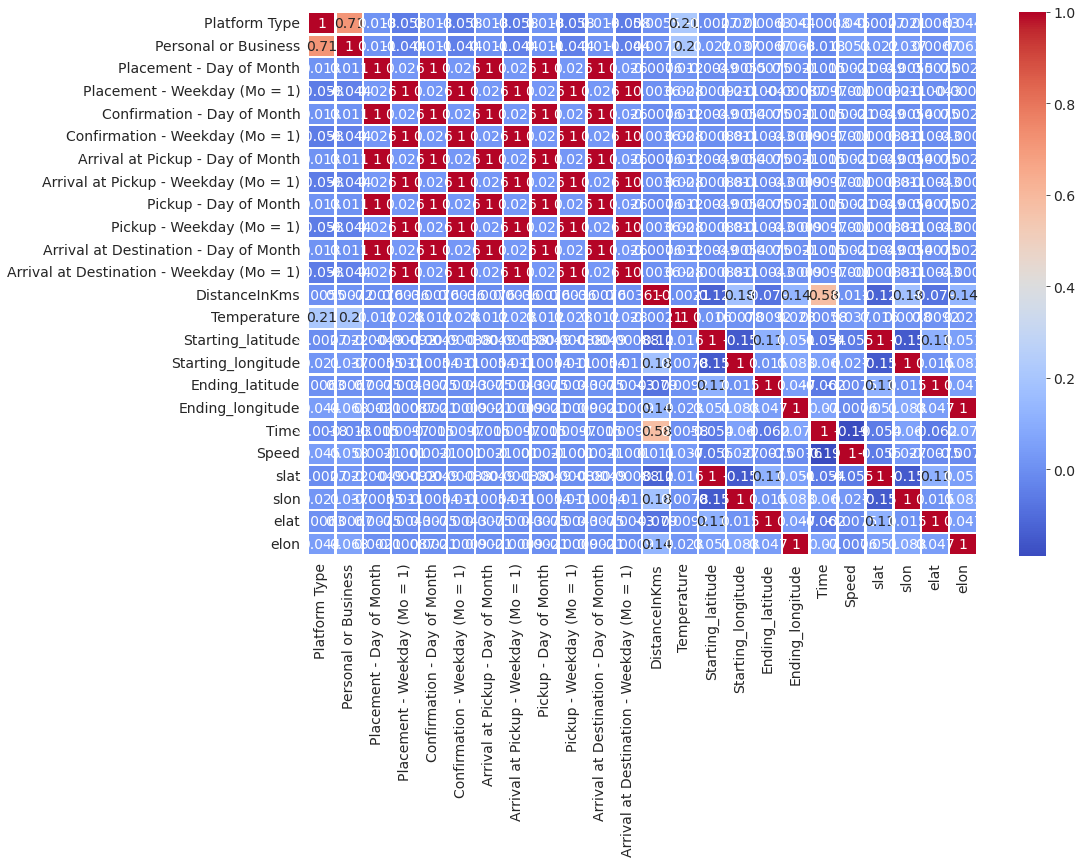

In [84]:
# Then appply filter methods by plotting a correlation matrix
# ---
#
df_corr = df.corr()
plt.figure(figsize=(15,10))

# We then plot our heatmap visualistion
# 
import seaborn as sns
sns.heatmap(df_corr, annot=True, linewidth=1.5, cmap='coolwarm');

We resolve to drop height since it has a weaker correlation to Weight, which is our response variable.

###Feature importance



the decison tree regressor provides a feature importance score for each column in the input

In [97]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': dec_regressor.feature_importances_
}).sort_values('importance', ascending=False)

In [98]:
importance_df.head(15)

,feature,importance
12,DistanceInKms,0.501577
14,Speed,0.496709
13,Temperature,0.000336
2,Placement - Day of Month,0.000265
8,Pickup - Day of Month,0.000234
17,elat,0.000169
16,slon,0.000154
4,Confirmation - Day of Month,0.000126
7,Arrival at Pickup - Weekday (Mo = 1),0.000123
18,elon,0.000099


We resolve to drop the below columns as they have the weakest correlation to Time which is our target variable.

feature:	importance

1) Platform Type:	0.000003

2) Personal or Business:	0.000003

3) Pickup - Weekday (Mo = 1):	0.000012

4) Arrival at Pickup - Day of Month: 0.000013

5) Arrival at Destination - Day of Month: 0.000014


In [93]:
new_df = df.drop(columns =['Platform Type','Personal or Business','Pickup - Weekday (Mo = 1)','Arrival at Pickup - Day of Month','Arrival at Destination - Day of Month' ] )

In [96]:
new_df.columns

Index(['User Id', 'Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
       'Placement - Time', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Confirmation - Time',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Time',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'DistanceInKms', 'Temperature',
       'Starting_latitude', 'Starting_longitude', 'Ending_latitude',
       'Ending_longitude', 'Rider Id', 'Time', 'Speed', 'slat', 'slon', 'elat',
       'elon'],
      dtype='object')

##### Implementation and Evaluation

In [122]:
# Then perform our modeling, comparing the resulting accuracy to the previous base solution.
# ---
# We select our features
X = new_df[['DistanceInKms','Speed','Temperature', 'Placement - Day of Month','Pickup - Day of Month', 'elat','slon','Confirmation - Day of Month','Arrival at Pickup - Weekday (Mo = 1)','elon','slat','Placement - Weekday (Mo = 1)','Arrival at Destination - Weekday (Mo = 1)','Confirmation - Weekday (Mo = 1)']]
y = new_df['Time']

# Splitting our dataset  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

# Performing standardisation
from sklearn.preprocessing import StandardScaler

#instantiate scaler object
Standard_scaler = StandardScaler() 

#fit the scaler
Standard_scaler.fit(X_train)

# transform the training&test data ie Scaling the dataset using the transform method of scaler.
X_train = Standard_scaler.transform(X_train)
X_test = Standard_scaler.transform(X_test)

# Fitting in our models   
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluate our model 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 836.1102014674058
KNN RMSE: 837.9494207323654
Decision Tree RMSE: 97.67069756436813


#####Observation

After applying the filter feature selection and using the important features only, the RMSE for each of the models has decreased comapred to the base model

SVM RMSE: decreased from 850.4777457581517 to 836.1102014674058

KNN RMSE: decreased from 862.0363601524862 to 837.9494207323654

Decision Tree RMSE: increased from 83.62216001093891 to 97.67069756436813




### Wrapper Method: Step Forward Feature Selection

In [107]:
# Describing our dataset
df.describe()

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),DistanceInKms,Temperature,Starting_latitude,Starting_longitude,Ending_latitude,Ending_longitude,Time,Speed,slat,slon,elat,elon
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,0.819961,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,-1.281470,36.811264,-1.282581,36.811220,1556.920947,69.251494,-0.022366,0.642478,-0.022385,0.642477
std,0.625178,0.384229,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.222006,0.030507,0.037473,0.034824,0.044721,987.270788,529.249252,0.000532,0.000654,0.000608,0.000781
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,-1.438302,36.653621,-1.430298,36.606594,1.000000,0.255624,-0.025103,0.639726,-0.024963,0.638906
25%,3.000000,1.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,21.400000,-1.300921,36.784605,-1.301201,36.785661,882.000000,4.573171,-0.022705,0.642012,-0.022710,0.642031
50%,3.000000,1.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.258889,-1.279395,36.807040,-1.284382,36.808002,1369.000000,6.406834,-0.022330,0.642404,-0.022417,0.642421
75%,3.000000,1.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,25.300000,-1.257147,36.829741,-1.261177,36.829477,2040.000000,8.413462,-0.021941,0.642800,-0.022012,0.642796
max,4.000000,1.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000,17000.000000,-0.020022,0.645616,-0.017981,0.646065


In [108]:
# Count the NaN under an entire DataFrame:
df.isnull().sum().sum()

0

##### Implementation and Evaluation

In [106]:
# We'll need import and install the following packages: six, sys, mlrose and joblib
# to use `SequentialFeatureSelector` for feature selection from mlxtend.

# importing six and sys
import six
import sys
sys.modules['sklearn.externals.six'] = six

# installing mlrose
!pip install mlrose
import mlrose

# importing joblib
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [123]:
# Creating a base model by performing standardization.
# we shall use this base model to comapre to the solution after perfoming feature selection - Wrapper Method: Step Forward 

# Selecting the features 
X = df[['Platform Type','Personal or Business','Placement - Day of Month', 'Placement - Weekday (Mo = 1)','Confirmation - Day of Month','Confirmation - Weekday (Mo = 1)','Arrival at Pickup - Day of Month','Arrival at Pickup - Weekday (Mo = 1)','Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)','Arrival at Destination - Day of Month','Arrival at Destination - Weekday (Mo = 1)','DistanceInKms','Temperature','Speed', 'slat','slon','elat','elon']]
y = df['Time']

# Splitting our dataset  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

# Performing standardisation
from sklearn.preprocessing import StandardScaler

#instantiate scaler object
Standard_scaler = StandardScaler() 

#fit the scaler
Standard_scaler.fit(X_train)

# transform the training&test data ie Scaling the dataset using the transform method of scaler.
X_train = Standard_scaler.transform(X_train)
X_test = Standard_scaler.transform(X_test)

# Selecting the ML algorithm to use   
dec_regressor = DecisionTreeRegressor(random_state=27)

# We pass the dec_regressor the estimator to the SequentialFeatureSelector function. 
# The k_features specifies the number of features to select. 
# We can set any number of features here. The forward parameter, if set to True, 
# performs step forward feature selection. The verbose parameter is used for logging 
# the progress of the feature selector, the scoring parameter defines the performance 
# evaluation criteria and finally, cv refers to cross-validation folds.
# ---
# Hint: Hover cursor on SequentialFeatureSelector to get a list of more parameter values.
# ---
#
from mlxtend.feature_selection import SequentialFeatureSelector
feature_selector = SequentialFeatureSelector(dec_regressor,
           k_features=4,
           forward=True,
           verbose=2,
           scoring='r2',
           cv=4)

# Perform step forward feature selection
feature_selector = feature_selector.fit(X_train, y_train) 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.6s finished

[2021-12-29 09:41:04] Features: 1/4 -- score: 0.34358359489505375[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.8s finished

[2021-12-29 09:41:04] Features: 2/4 -- score: 0.9964584602792753[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    2.2s finished

[2021-12-29 09:41:07] Features: 3/4 -- score: 0.9965035065261879[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [124]:
# Which are the selected features?# The columns at these indexes are those which were selected

feat_cols = list(feature_selector.k_feature_idx_)
print(feat_cols)

[0, 7, 12, 14]


In [135]:
#getting the selected columns names using their indexes above
X.columns[[0, 7, 12, 14]]

Index(['Platform Type', 'Arrival at Pickup - Weekday (Mo = 1)',
       'DistanceInKms', 'Speed'],
      dtype='object')

In [125]:
# We can now use those features to build our model

# Without step forward feature selection (sffs)
dec_regressor = DecisionTreeRegressor(random_state=27)
dec_regressor.fit(X_train, y_train)

# With step forward feature selection
dec_regressor2 = DecisionTreeRegressor(random_state=27)
dec_regressor2.fit(X_train[:, feat_cols], y_train)

# Making Predictions and determining the accuracies
y_test_pred = dec_regressor.predict(X_test)
print('Decision Tree RMSE Without sffs:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

y_test_pred2 = dec_regressor2.predict(X_test[:, feat_cols])
print('Decision Tree RMSE with sffs:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred2)))

Decision Tree RMSE Without sffs: 97.84823533247602
Decision Tree RMSE with sffs: 79.22908901297635


#####Observation

After applying the Wrapper-Step Forward feature selection, the RMSE for the base model we used has decreased from 97.84823533247602 to 79.22908901297635

the chosen features are: 

[0] - 'Platform Type', 

[7] - 'Arrival at Pickup - Weekday (Mo = 1)', 

[12] - 'DistanceInKms',

[14] - 'Speed'



### Wrapper Method: Step Backward Feature Selection</font>

In [112]:
# Describing our dataset
df.describe()

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),DistanceInKms,Temperature,Starting_latitude,Starting_longitude,Ending_latitude,Ending_longitude,Time,Speed,slat,slon,elat,elon
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,0.819961,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,-1.281470,36.811264,-1.282581,36.811220,1556.920947,69.251494,-0.022366,0.642478,-0.022385,0.642477
std,0.625178,0.384229,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.222006,0.030507,0.037473,0.034824,0.044721,987.270788,529.249252,0.000532,0.000654,0.000608,0.000781
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,-1.438302,36.653621,-1.430298,36.606594,1.000000,0.255624,-0.025103,0.639726,-0.024963,0.638906
25%,3.000000,1.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,21.400000,-1.300921,36.784605,-1.301201,36.785661,882.000000,4.573171,-0.022705,0.642012,-0.022710,0.642031
50%,3.000000,1.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.258889,-1.279395,36.807040,-1.284382,36.808002,1369.000000,6.406834,-0.022330,0.642404,-0.022417,0.642421
75%,3.000000,1.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,25.300000,-1.257147,36.829741,-1.261177,36.829477,2040.000000,8.413462,-0.021941,0.642800,-0.022012,0.642796
max,4.000000,1.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000,17000.000000,-0.020022,0.645616,-0.017981,0.646065


#####Implementation and Evaluation

In [130]:
# Creating a base model by performing standardization.
# we shall use this base model to compare to the solution after perfoming feature selection - Wrapper Method: Step Backward 
# ---

# Selecting the features 
X = df[['Platform Type','Personal or Business','Placement - Day of Month', 'Placement - Weekday (Mo = 1)','Confirmation - Day of Month','Confirmation - Weekday (Mo = 1)','Arrival at Pickup - Day of Month','Arrival at Pickup - Weekday (Mo = 1)','Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)','Arrival at Destination - Day of Month','Arrival at Destination - Weekday (Mo = 1)','DistanceInKms','Temperature','Speed', 'slat','slon','elat','elon']]
y = df['Time']

# Splitting our dataset  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

# Performing standardisation
from sklearn.preprocessing import StandardScaler

#instantiate scaler object
Standard_scaler = StandardScaler() 

#fit the scaler
Standard_scaler.fit(X_train)

# transform the training&test data ie Scaling the dataset using the transform method of scaler.
X_train = Standard_scaler.transform(X_train)
X_test = Standard_scaler.transform(X_test)

# Selecting the ML algorithm to use   
dec_regressor = DecisionTreeRegressor(random_state=27)

# We pass the dec_regressor the estimator to the SequentialFeatureSelector function. 
# The k_features specifies the number of features to select. 
# We can set any number of features here. The forward parameter, if set to False, 
# performs step backward feature selection. The verbose parameter is used for logging 
# the progress of the feature selector, the scoring parameter defines the performance 
# evaluation criteria and finally, cv refers to cross-validation folds.
# ---
# Hint: Hover cursor on SequentialFeatureSelector to get a list of more parameter values.
# ---
#
from mlxtend.feature_selection import SequentialFeatureSelector
feature_selector = SequentialFeatureSelector(dec_regressor,
           k_features=4,
           forward=False,
           verbose=2,
           scoring='r2',
           cv=4)
 
# Perform step backward feature selection
feature_selector = feature_selector.fit(X_train, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   10.6s finished

[2021-12-29 10:01:43] Features: 18/4 -- score: 0.9934949847134877[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    9.1s finished

[2021-12-29 10:01:52] Features: 17/4 -- score: 0.9943235573391767[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    7.9s finished

[2021-12-29 10:02:00] Features: 16/4 -- score: 0.9947559635502204[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [131]:
# Which are the selected features? The columns at these indexes are those which were selected

feat_cols = list(feature_selector.k_feature_idx_)
print(feat_cols)

[0, 4, 12, 14]


In [133]:
#getting the selected columns names using their indexes above
X.columns[[0, 4, 12, 14]]


Index(['Platform Type', 'Confirmation - Day of Month', 'DistanceInKms',
       'Speed'],
      dtype='object')

In [136]:
# We can now use those features to build a full model

# Without step backward feature selection (sbfs)
dec_regressor = DecisionTreeRegressor(random_state=27)
dec_regressor.fit(X_train, y_train)

# With step backward feature selection
dec_regressor2 = DecisionTreeRegressor(random_state=27)
dec_regressor2.fit(X_train[:, feat_cols], y_train)

# Making Predictions and determining the accuracies  
y_test_pred = dec_regressor.predict(X_test)
print('Decision Tree RMSE Without sbfs:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

y_test_pred2 = dec_regressor2.predict(X_test[:, feat_cols])
print('Decision Tree RMSE with sbfs:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred2)))

Decision Tree RMSE Without sbfs: 97.84823533247602
Decision Tree RMSE with sbfs: 71.94717183665522


#####Observation

After applying the Wrapper-Step backward feature selection, the RMSE for the base model we used has decreased from 97.84823533247602 to 71.94717183665522

the chosen features are: 

1)'Platform Type',

2)'Confirmation - Day of Month',

3)'DistanceInKms',
 
4)'Speed'
     



### Wrapper Method: Recursive Feature Elimination</font>

In [116]:
# Describing our dataset
df.describe()

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),DistanceInKms,Temperature,Starting_latitude,Starting_longitude,Ending_latitude,Ending_longitude,Time,Speed,slat,slon,elat,elon
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,0.819961,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,-1.281470,36.811264,-1.282581,36.811220,1556.920947,69.251494,-0.022366,0.642478,-0.022385,0.642477
std,0.625178,0.384229,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.222006,0.030507,0.037473,0.034824,0.044721,987.270788,529.249252,0.000532,0.000654,0.000608,0.000781
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,-1.438302,36.653621,-1.430298,36.606594,1.000000,0.255624,-0.025103,0.639726,-0.024963,0.638906
25%,3.000000,1.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,21.400000,-1.300921,36.784605,-1.301201,36.785661,882.000000,4.573171,-0.022705,0.642012,-0.022710,0.642031
50%,3.000000,1.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.258889,-1.279395,36.807040,-1.284382,36.808002,1369.000000,6.406834,-0.022330,0.642404,-0.022417,0.642421
75%,3.000000,1.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,25.300000,-1.257147,36.829741,-1.261177,36.829477,2040.000000,8.413462,-0.021941,0.642800,-0.022012,0.642796
max,4.000000,1.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000,17000.000000,-0.020022,0.645616,-0.017981,0.646065


#####Implementation and Evaluation

In [137]:
# Creating a model by performing standardization, and then perfoming feature selection - Wrapper Method: Recursive Feature Selection
# ---

# Selecting the features 
X = df[['Platform Type','Personal or Business','Placement - Day of Month', 'Placement - Weekday (Mo = 1)','Confirmation - Day of Month','Confirmation - Weekday (Mo = 1)','Arrival at Pickup - Day of Month','Arrival at Pickup - Weekday (Mo = 1)','Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)','Arrival at Destination - Day of Month','Arrival at Destination - Weekday (Mo = 1)','DistanceInKms','Temperature','Speed', 'slat','slon','elat','elon']]
y = df['Time']

# Splitting our dataset  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)
 
# Performing standardisation
from sklearn.preprocessing import StandardScaler

#instantiate scaler object
Standard_scaler = StandardScaler() 

#fit the scaler
Standard_scaler.fit(X_train)

# transform the training&test data ie Scaling the dataset using the transform method of scaler.
X_train = Standard_scaler.transform(X_train)
X_test = Standard_scaler.transform(X_test)

# Fitting in our models   

svm_regressor = SVR(kernel="linear")   
dec_regressor = DecisionTreeRegressor(random_state=27)

# We want to select the best 2 features for our model. 
# NB: n_features_to_select will include the response variable
# ---
#  
from sklearn.feature_selection import RFE
svm_regressor = RFE(svm_regressor, n_features_to_select = 3, step=1)
dec_regressor = RFE(dec_regressor, n_features_to_select = 3, step=1)

svm_regressor.fit(X_train, y_train) 
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test) 
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluate our model  
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred))) 
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))
 
# Displaying our best features
print('SVM Selected features: %s' % list(X.columns[svm_regressor.support_]))
print('Decision Tree Selected features: %s' % list(X.columns[dec_regressor.support_]))

SVM RMSE: 809.7795057105936
Decision Tree RMSE: 83.97268628626657
SVM Selected features: ['DistanceInKms', 'Speed', 'slon']
Decision Tree Selected features: ['DistanceInKms', 'Speed', 'elon']


#####Observations


The RFE was used to select the features (columns) in the training dataset that are most relevant in predicting the target variable Time.

1) using the algorithm SVM, the selected features are :'DistanceInKms', 'Speed', 'slon'

2) using the algorithm Decision Tree, the Selected features are:'DistanceInKms', 'Speed', 'elon'

3) The RFE with a decision tree model achieves a much smaller RMSE value of 83.97268



### Feature Transformation: Principal Component Analysis

In [118]:
# Describing our dataset
df.describe()

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),DistanceInKms,Temperature,Starting_latitude,Starting_longitude,Ending_latitude,Ending_longitude,Time,Speed,slat,slon,elat,elon
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,0.819961,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,-1.281470,36.811264,-1.282581,36.811220,1556.920947,69.251494,-0.022366,0.642478,-0.022385,0.642477
std,0.625178,0.384229,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.222006,0.030507,0.037473,0.034824,0.044721,987.270788,529.249252,0.000532,0.000654,0.000608,0.000781
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,-1.438302,36.653621,-1.430298,36.606594,1.000000,0.255624,-0.025103,0.639726,-0.024963,0.638906
25%,3.000000,1.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,21.400000,-1.300921,36.784605,-1.301201,36.785661,882.000000,4.573171,-0.022705,0.642012,-0.022710,0.642031
50%,3.000000,1.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.258889,-1.279395,36.807040,-1.284382,36.808002,1369.000000,6.406834,-0.022330,0.642404,-0.022417,0.642421
75%,3.000000,1.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,25.300000,-1.257147,36.829741,-1.261177,36.829477,2040.000000,8.413462,-0.021941,0.642800,-0.022012,0.642796
max,4.000000,1.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000,17000.000000,-0.020022,0.645616,-0.017981,0.646065


##### Implementation and Evaluation

In [138]:
# Creating the base models and check for the accuracy, later compare it with the PCA implementation.

# Selecting the features 
X = df[['Platform Type','Personal or Business','Placement - Day of Month', 'Placement - Weekday (Mo = 1)','Confirmation - Day of Month','Confirmation - Weekday (Mo = 1)','Arrival at Pickup - Day of Month','Arrival at Pickup - Weekday (Mo = 1)','Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)','Arrival at Destination - Day of Month','Arrival at Destination - Weekday (Mo = 1)','DistanceInKms','Temperature','Speed', 'slat','slon','elat','elon']]
y = df['Time']

# Splitting our dataset  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

#instantiate scaler object
Standard_scaler = StandardScaler() 

#fit the scaler
Standard_scaler.fit(X_train)

# transform the training&test data ie Scaling the dataset using the transform method of scaler.
X_train = Standard_scaler.transform(X_train)
X_test = Standard_scaler.transform(X_test)

# Fitting in our models   
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluating our models  
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 838.3226086474374
KNN RMSE: 844.6372049539696
Decision Tree RMSE: 97.84823533247602


In [139]:
# Applying PCA to our base model above

# Selecting the features 
X = df[['Platform Type','Personal or Business','Placement - Day of Month', 'Placement - Weekday (Mo = 1)','Confirmation - Day of Month','Confirmation - Weekday (Mo = 1)','Arrival at Pickup - Day of Month','Arrival at Pickup - Weekday (Mo = 1)','Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)','Arrival at Destination - Day of Month','Arrival at Destination - Weekday (Mo = 1)','DistanceInKms','Temperature','Speed', 'slat','slon','elat','elon']]
y = df['Time']

# Splitting our dataset  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

#instantiate scaler object
Standard_scaler = StandardScaler() 

#fit the scaler
Standard_scaler.fit(X_train)

# transform the training&test data ie Scaling the dataset using the transform method of scaler.
X_train = Standard_scaler.transform(X_train)
X_test = Standard_scaler.transform(X_test)

# Applying PCA
# ---
# NB: PCA relies the feature set and not the label data.
# ---
# 
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Fitting in our models   
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluating our models 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 838.3226086474374
KNN RMSE: 844.6372049539696
Decision Tree RMSE: 1095.841599284123


#####Observation

The RMSE for the decison model has greatly increased to 1095.84 as compared to the base model which was 97.84823533247602


### Feature Transformation: Linear Discriminant Analysis

In [ ]:
# Describing our dataset
df.describe()

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),DistanceInKms,Temperature,Starting_latitude,Starting_longitude,Ending_latitude,Ending_longitude,Time,Speed,slat,slon,elat,elon
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,0.819961,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,-1.281470,36.811264,-1.282581,36.811220,1556.920947,69.251494,-0.022366,0.642478,-0.022385,0.642477
std,0.625178,0.384229,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.222006,0.030507,0.037473,0.034824,0.044721,987.270788,529.249252,0.000532,0.000654,0.000608,0.000781
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,-1.438302,36.653621,-1.430298,36.606594,1.000000,0.255624,-0.025103,0.639726,-0.024963,0.638906
25%,3.000000,1.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,21.400000,-1.300921,36.784605,-1.301201,36.785661,882.000000,4.573171,-0.022705,0.642012,-0.022710,0.642031
50%,3.000000,1.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.258889,-1.279395,36.807040,-1.284382,36.808002,1369.000000,6.406834,-0.022330,0.642404,-0.022417,0.642421
75%,3.000000,1.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,25.300000,-1.257147,36.829741,-1.261177,36.829477,2040.000000,8.413462,-0.021941,0.642800,-0.022012,0.642796
max,4.000000,1.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000,17000.000000,-0.020022,0.645616,-0.017981,0.646065


##### Observation and conclusion

Linear discriminant analysis is a classification machine learning algorithm. 

Our target variable 'Time' is a continous variable thus regression algorithms will be best suited for this prediction. LDA cannot be used.
